# Multiple classification


## Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
import os
from skimage.transform import resize

## Importing data Zip file


In [2]:
import zipfile
!wget https://thinkingneuron.com/wp-content/uploads/2020/10/Face-Images.zip
zipref=zipfile.ZipFile("Face-Images.zip")
zipref.extractall()
zipref.close()

--2022-12-11 12:25:40--  https://thinkingneuron.com/wp-content/uploads/2020/10/Face-Images.zip
Resolving thinkingneuron.com (thinkingneuron.com)... 68.66.224.28
Connecting to thinkingneuron.com (thinkingneuron.com)|68.66.224.28|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15310993 (15M) [application/zip]
Saving to: ‘Face-Images.zip.1’

Face-Images.zip.1   100%[===================>]  14.60M  6.94MB/s    in 2.1s    

2022-12-11 12:25:43 (6.94 MB/s) - ‘Face-Images.zip.1’ saved [15310993/15310993]



In [3]:
train_ref="Face Images/Final Training Images"
test_ref="Face Images/Final Testing Images"

## Importing classes

In [4]:
import pathlib
dir=pathlib.Path(train_ref)
classes=np.array(sorted([item.name for item in dir.glob("*")]))
classes=classes[1:]
# classes.sort()
print(classes)

['face1' 'face10' 'face11' 'face12' 'face13' 'face14' 'face15' 'face16'
 'face2' 'face3' 'face4' 'face5' 'face6' 'face7' 'face8' 'face9']


## Preprocessing the data

In [10]:
from keras.preprocessing.image import ImageDataGenerator
train_gen=ImageDataGenerator(rescale=1/255.,
                             width_shift_range=0.3,
                             height_shift_range=0.2,
                             zoom_range=0.2,
                             rotation_range=0.3)
test_gen=ImageDataGenerator(rescale=1/255.)
train_set=train_gen.flow_from_directory(train_ref,target_size=(112,112),batch_size=8,class_mode="categorical")
test_set=test_gen.flow_from_directory(test_ref,target_size=(112,112),batch_size=8,class_mode="categorical")

Found 244 images belonging to 16 classes.
Found 64 images belonging to 16 classes.


## View random images

In [6]:
import random
def viewrandomimages(n):
  plt.figure(figsize=(10,9))
  for i in range(n):
    targetclass=classes[random.randrange(0,len(classes))]
    targetdir=train_ref+"/"+targetclass
    random_image=random.sample(os.listdir(targetdir),1)
    # print(random_image)
    plt.subplot(4,4,i+1)
    img=mpimg.imread(targetdir+"/"+random_image[0])
    plt.title(targetclass)
    plt.imshow(img)
    plt.axis("off")
  plt.show()

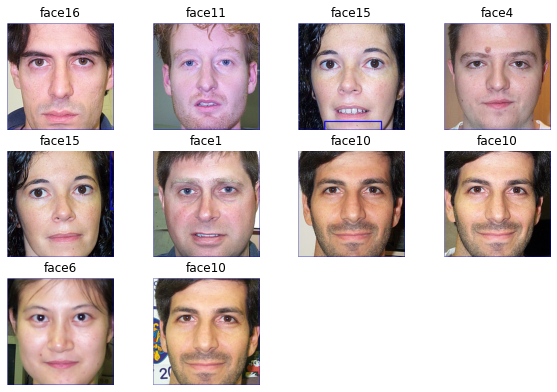

In [7]:
viewrandomimages(10)

## Making CNN model

In [17]:
model1=tf.keras.models.Sequential()
model1.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,input_shape=[112,112,3],activation="relu"))
model1.add(tf.keras.layers.MaxPool2D(strides=2,pool_size=(2,2)))
model1.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation="relu"))
model1.add(tf.keras.layers.MaxPool2D(strides=2,pool_size=(2,2)))
model1.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation="relu"))
model1.add(tf.keras.layers.MaxPool2D(strides=2,pool_size=(2,2)))
model1.add(tf.keras.layers.Flatten())
model1.add(tf.keras.layers.Dense(units=128,activation="relu"))
model1.add(tf.keras.layers.Dense(units=16,activation="softmax"))

## Fitting the model

In [18]:
model1.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])
model1.fit(x=train_set,validation_data=test_set,epochs=30)

Epoch 1/30
31/31 [==============================] - 2s 58ms/step - loss: 2.8158 - accuracy: 0.0328 - val_loss: 2.7724 - val_accuracy: 0.0625
Epoch 2/30
31/31 [==============================] - 2s 53ms/step - loss: 2.7761 - accuracy: 0.0246 - val_loss: 2.7719 - val_accuracy: 0.0469
Epoch 3/30
31/31 [==============================] - 2s 52ms/step - loss: 2.7809 - accuracy: 0.0492 - val_loss: 2.7700 - val_accuracy: 0.0625
Epoch 4/30
31/31 [==============================] - 2s 52ms/step - loss: 2.7715 - accuracy: 0.0697 - val_loss: 2.7685 - val_accuracy: 0.1094
Epoch 5/30
31/31 [==============================] - 2s 51ms/step - loss: 2.7507 - accuracy: 0.0902 - val_loss: 2.6721 - val_accuracy: 0.1406
Epoch 6/30
31/31 [==============================] - 2s 52ms/step - loss: 2.7377 - accuracy: 0.0943 - val_loss: 2.6197 - val_accuracy: 0.0625
Epoch 7/30
31/31 [==============================] - 2s 52ms/step - loss: 2.6519 - accuracy: 0.0902 - val_loss: 2.4933 - val_accuracy: 0.0781
Epoch 8/30
31

In [19]:
model1.evaluate(test_set)

8/8 [==============================] - 0s 24ms/step - loss: 0.4865 - accuracy: 0.8906


[0.48649391531944275, 0.890625]

## Prediting Results

In [24]:
def Open_and_Predict(file_name):
  test_image=plt.imread(file_name)
  test_image=resize(test_image,(112,112))
  im=test_image
  test_image=np.expand_dims(test_image,axis=0)
  result=model1.predict(test_image)
  # print(result)
  plt.imshow(im)
  plt.title(classes[np.argmax(result)])
  plt.axis("off")

1/1 [==============================] - 0s 23ms/step


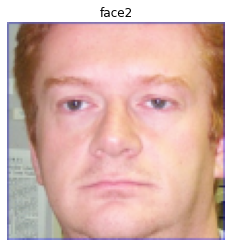

In [26]:
Open_and_Predict("Face Images/Final Testing Images/face2/1face2.jpg")